## Context

Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem..

## Problem

In this problem you do not have to predict actual price but a price range indicating how high the price is


### Importing the Library


In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Importing & Exploring Data


In [163]:
# Loading the data from csv file..

data = pd.read_csv('train.csv')

In [164]:
# Top datasets of data..

data.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [165]:
# Number of Rows and Columns in data..

data.shape

(2000, 21)

In [166]:
# Getting some informations about the data..

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [167]:
# Checking the number of missing values in columns..


print('There is no null values in the dataset')
data.isnull().sum()

There is no null values in the dataset


battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [168]:
# Unique values..


print('We can see there are few catogorical columns and most of them are descret columns')
data.nunique().sort_values(ascending=True)

We can see there are few catogorical columns and most of them are descret columns


blue                2
touch_screen        2
dual_sim            2
four_g              2
three_g             2
wifi                2
price_range         4
n_cores             8
m_dep              10
sc_h               15
talk_time          19
sc_w               19
fc                 20
pc                 21
clock_speed        26
int_memory         63
mobile_wt         121
battery_power    1094
px_width         1109
px_height        1137
ram              1562
dtype: int64

In [169]:
# Getting some statistical measures of the data..

data.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [170]:
# Correlationship between columns..

data.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


<AxesSubplot:>

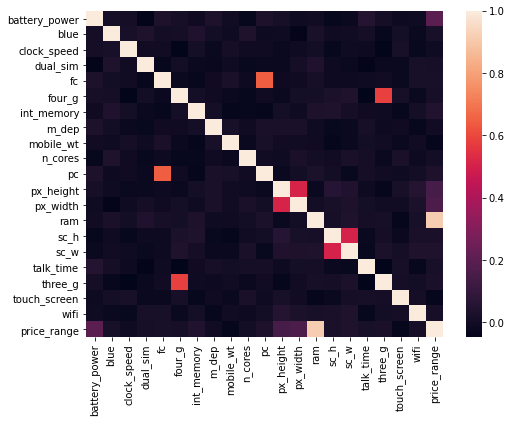

In [171]:
# visualizing the correlationship..

plt.figure(figsize=(8,6))
sns.heatmap(data.corr())

In [172]:
# Count of price range..

for i in (0,1,2,3):
    print('Count of price range:',i,(data['price_range']==i).sum())

Count of price range: 0 500
Count of price range: 1 500
Count of price range: 2 500
Count of price range: 3 500



###  Data visualization


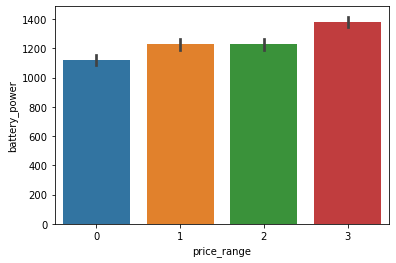

As battery power increasing price is also increasing


In [173]:
# price range vs battery power..

sns.barplot(x='price_range',y='battery_power',data=data)
plt.show()
print('As battery power increasing price is also increasing')

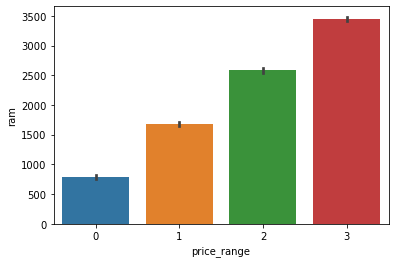

As Ram is increasing price is also increasing


In [174]:
# price range vs ram..

sns.barplot(x='price_range',y='ram',data=data)
plt.show()
print('As Ram is increasing price is also increasing')

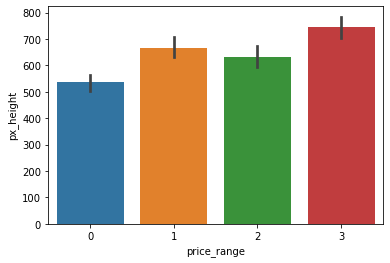

As px height is increasing price is increasing


In [175]:
# price range vs px height..

plt.subplot()
sns.barplot(x='price_range',y='px_height',data=data)
plt.show()
print('As px height is increasing price is increasing')

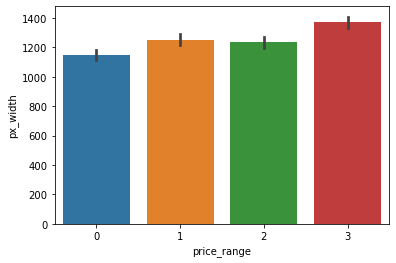

As px width is increasing price is also increasing


In [176]:
# price range vs px width..

sns.barplot(x='price_range',y='px_width',data=data)
plt.show()
print('As px width is increasing price is also increasing')

In [177]:
data.groupby(['price_range']).median()['mobile_wt']

price_range
0    142.0
1    141.0
2    145.0
3    134.0
Name: mobile_wt, dtype: float64

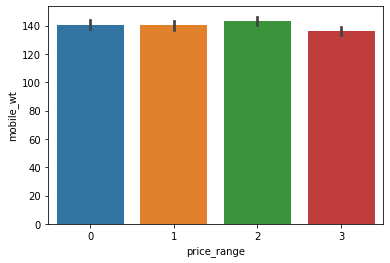

As mobile weight is increasing price is decreasing


In [178]:
sns.barplot(x='price_range',y='mobile_wt',data=data)
plt.show()
print('As mobile weight is increasing price is decreasing')

### Feature Selection

#### As we have seen only 5 features are having high relationship to the price range whice are as follows:
1. Battery power
2. Ram
3. Mobile weight
4. px_height
5. px width


### Separating Features & Target 


In [179]:
x = data[['battery_power','ram','mobile_wt','px_height','px_width']]
y = data['price_range']

In [180]:
# Importing train test split..

from sklearn.model_selection import train_test_split

In [181]:
# Spliting the data into training & testing

train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.3,random_state=0)

In [182]:
# Checking shapes..

print(train_x.shape,test_x.shape,train_y.shape,test_y.shape)

(1400, 5) (600, 5) (1400,) (600,)


In [183]:
# Importing Standard Scaler..

from sklearn.preprocessing import StandardScaler

In [184]:
scaler = StandardScaler()

In [185]:
# Scaling the data..

test_x_s = scaler.fit_transform(test_x)
train_x_s = scaler.fit_transform(train_x)


## Model Application


### KNN Model

In [186]:
# Importing Model from sklearn..

from sklearn.neighbors import KNeighborsClassifier

In [187]:
model_knn = KNeighborsClassifier()

In [188]:
# Fitting the model..

model_knn.fit(train_x_s,train_y)

KNeighborsClassifier()

In [189]:
# Predicting the modle..

pred_1 = model_knn.predict(test_x_s)

In [190]:
# Score of training part..

model_knn.score(train_x_s,train_y)

0.91

In [191]:
# Score of testing part..

model_knn.score(test_x_s,test_y)

0.84

In [192]:
# Importing Grid Search for Cross validation..

from sklearn.model_selection import GridSearchCV

In [193]:
# Making params for cross validation..

params ={'n_neighbors':[1,3,5,7,9,11],'p':[1,2],
         'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
         'weights':['uniform', 'distance']} 

In [194]:
gscv = GridSearchCV(estimator=KNeighborsClassifier(),param_grid=params,scoring='accuracy',verbose=1)

In [195]:
gscv.fit(train_x_s,train_y)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [196]:
# Best params_..

gscv.best_params_

{'algorithm': 'auto', 'n_neighbors': 11, 'p': 1, 'weights': 'distance'}

In [197]:
model_knn = KNeighborsClassifier(**gscv.best_params_)

In [198]:
# fitting KNN model..

model_knn.fit(train_x_s,train_y)

KNeighborsClassifier(n_neighbors=11, p=1, weights='distance')

In [199]:
# Score of KNN modle on training part..

model_knn.score(train_x_s,train_y)

1.0

In [200]:
# Score of KNN modle on test part..


model_knn.score(test_x_s,test_y)

0.8766666666666667

In [201]:
y_pred_knn = model_knn.predict(test_x_s)
y_pred_knn

array([3, 0, 2, 2, 2, 0, 0, 2, 3, 1, 0, 3, 0, 2, 3, 0, 3, 2, 2, 0, 0, 0,
       3, 1, 1, 2, 3, 1, 3, 1, 1, 0, 2, 0, 1, 3, 0, 0, 3, 3, 3, 1, 3, 2,
       1, 3, 0, 1, 3, 1, 1, 2, 0, 3, 0, 2, 2, 2, 0, 2, 3, 1, 3, 2, 1, 2,
       3, 2, 1, 2, 3, 2, 2, 0, 1, 3, 2, 1, 1, 2, 3, 3, 2, 0, 0, 0, 2, 1,
       2, 3, 1, 2, 3, 0, 0, 2, 2, 3, 0, 3, 1, 1, 2, 1, 3, 2, 2, 2, 2, 3,
       2, 0, 0, 1, 2, 3, 0, 0, 1, 0, 0, 3, 2, 2, 1, 1, 1, 1, 0, 1, 1, 3,
       3, 3, 3, 3, 3, 1, 0, 1, 1, 2, 1, 3, 0, 3, 0, 0, 2, 0, 1, 1, 1, 1,
       3, 0, 0, 3, 1, 3, 2, 1, 3, 1, 2, 3, 3, 2, 1, 0, 3, 2, 2, 3, 3, 0,
       2, 2, 3, 1, 2, 1, 0, 1, 2, 1, 2, 0, 3, 3, 1, 1, 0, 2, 3, 0, 1, 2,
       2, 0, 3, 3, 2, 1, 1, 3, 2, 3, 1, 0, 0, 2, 3, 3, 0, 0, 0, 3, 1, 3,
       3, 3, 0, 0, 2, 2, 3, 1, 0, 2, 0, 0, 0, 3, 2, 1, 2, 2, 1, 1, 0, 2,
       3, 3, 0, 0, 1, 3, 3, 2, 3, 0, 3, 1, 1, 0, 2, 3, 3, 2, 0, 0, 1, 2,
       3, 1, 1, 3, 1, 1, 1, 3, 2, 3, 1, 3, 2, 2, 2, 1, 0, 2, 1, 1, 0, 0,
       2, 2, 2, 2, 0, 1, 3, 0, 1, 2, 3, 0, 2, 0, 1,

#### Confusion Matrix & Accuracy

In [202]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [203]:
cm = confusion_matrix(test_y,y_pred_knn)

In [204]:
cm

array([[145,   6,   0,   0],
       [ 12, 118,   5,   0],
       [  0,  19, 125,   7],
       [  0,   0,  25, 138]], dtype=int64)

In [205]:
acc = accuracy_score(test_y,y_pred_knn)
acc

0.8766666666666667

In [206]:
 print('ACCURACY IS:',(acc)*100,'%')

ACCURACY IS: 87.66666666666667 %


### Prediction on Mobile Price Test Data

In [207]:
# Reading Test data..

t_data = pd.read_csv('test.csv')

In [208]:
t_data.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [209]:
t_data.shape

(1000, 21)

In [210]:
# Feature Selection..

t_data_new = t_data[['battery_power','ram','mobile_wt','px_height','px_width']]

In [211]:
# Scaling..

t_data_new_s = scaler.fit_transform(t_data_new)

In [212]:
model_knn = KNeighborsClassifier(**gscv.best_params_)

In [213]:
model_knn.fit(train_x_s,train_y)

KNeighborsClassifier(n_neighbors=11, p=1, weights='distance')

In [214]:
prediction = model_knn.predict(t_data_new_s)

In [215]:
# Storing the prediction price range in DataFrmae..

pred_price = pd.DataFrame({'Pred_Price':prediction})
pred_price.head(20)

,Pred_Price
0,2
1,3
2,3
3,3
4,1
5,3
6,3
7,1
8,3
9,0


In [216]:
t_data['Pred_price'] = pred_price

In [217]:
t_data

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,Pred_price
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,226,1412,3476,12,7,2,0,1,0,2
1,2,841,1,0.5,1,4,1,61,0.8,191,...,746,857,3895,6,0,7,1,0,0,3
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,1270,1366,2396,17,10,10,0,1,1,3
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,295,1752,3893,10,0,7,1,1,0,3
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,749,810,1773,15,8,7,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,644,913,2121,14,8,15,1,1,0,2
996,997,609,0,1.8,1,0,0,13,0.9,186,...,1152,1632,1933,8,1,19,0,1,1,2
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,477,825,1223,5,0,14,1,0,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,38,832,2509,15,11,6,0,1,0,2


### Decision Tree

In [226]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(criterion='entropy',max_depth=5)

In [227]:
model_dt.fit(train_x,train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [228]:
pred_y = model_dt.predict(test_x)

In [229]:
model_dt.score(train_x,train_y)

0.8835714285714286

In [230]:
pred = model_dt.predict(test_x)
pred

array([3, 0, 2, 2, 2, 0, 0, 2, 3, 1, 0, 3, 0, 3, 3, 0, 3, 2, 2, 1, 0, 0,
       3, 1, 1, 2, 3, 1, 3, 1, 1, 0, 1, 0, 1, 3, 0, 0, 3, 3, 2, 1, 3, 3,
       1, 3, 0, 1, 3, 1, 0, 2, 0, 3, 0, 2, 2, 1, 0, 3, 2, 1, 2, 2, 1, 2,
       3, 2, 2, 1, 3, 1, 1, 0, 1, 3, 2, 1, 2, 1, 3, 3, 3, 0, 0, 0, 2, 1,
       2, 3, 1, 3, 2, 1, 0, 3, 2, 3, 0, 3, 2, 1, 2, 1, 3, 2, 2, 3, 2, 3,
       2, 0, 0, 1, 2, 2, 0, 1, 1, 0, 1, 3, 2, 2, 1, 2, 1, 1, 0, 2, 1, 3,
       2, 3, 3, 3, 3, 1, 0, 1, 1, 2, 2, 3, 1, 3, 0, 0, 2, 0, 1, 1, 1, 1,
       3, 1, 1, 3, 1, 3, 2, 1, 3, 1, 2, 3, 3, 2, 1, 0, 3, 2, 1, 2, 3, 0,
       1, 2, 3, 0, 2, 1, 0, 1, 3, 2, 3, 0, 2, 3, 1, 1, 0, 2, 3, 0, 1, 3,
       1, 0, 3, 3, 3, 1, 1, 3, 3, 2, 0, 0, 0, 2, 3, 3, 0, 0, 1, 3, 2, 3,
       3, 3, 0, 0, 2, 3, 3, 2, 0, 2, 0, 0, 0, 3, 3, 1, 2, 2, 0, 1, 1, 2,
       3, 3, 0, 0, 1, 3, 2, 1, 3, 0, 3, 1, 1, 0, 2, 3, 3, 2, 0, 0, 1, 2,
       3, 2, 2, 3, 2, 1, 0, 3, 2, 2, 2, 3, 2, 2, 2, 1, 0, 2, 1, 1, 0, 0,
       3, 2, 2, 2, 0, 1, 3, 0, 1, 2, 2, 0, 2, 0, 0,

In [231]:

model_dt.score(test_x,pred)

1.0

In [232]:
from sklearn import tree

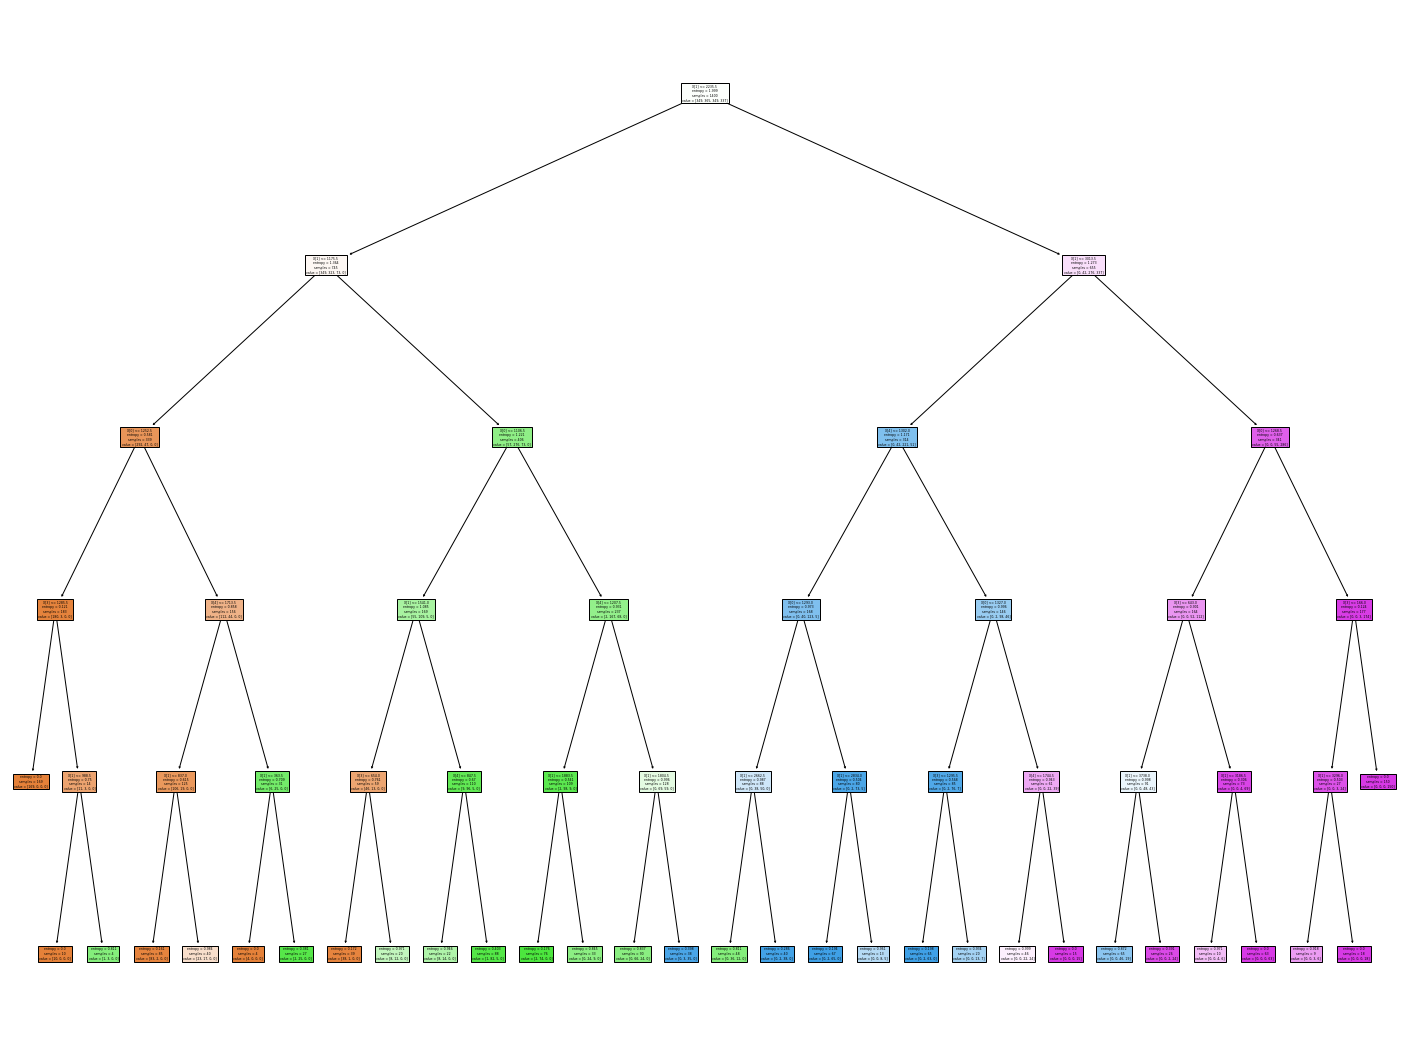

In [233]:

plt.figure(figsize=(25,19))
tree.plot_tree(model_dt,filled=True)
plt.show()

## Conclusion

By analysing the Mobile price data we found some insight which are as follows:

price is dependent mainly on these 5 features:

                            i- Mobile battery
                            
                           ii- RAM
                           
                          iii- Mobile weight
                          
                           iv- Px width
                           
                            v-  Px height
                              
Accuracy on train data is 87.6 % by KNN modle..

Accuracy on train data is 88.3 % by Decision Tree modle..